# PREDICTION DES RETARDS DE VOL

## 1. IMPORT DES LIBRAIRIES

In [3]:
import pandas as pd
import numpy as npimport 
from os.path import join as join

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



## 2. CHARGEMENT DES DONNÉES

In [ ]:
#df_data = pd.read_csv(join('data','2016_01.csv'))

# Load all CSVs into the "dfs" variable
dfs = []

for month in range(1, 13):
    file = f"data/2016_{month:02}.csv"
    try:
        tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)
        dfs.append(tmp)
        print(f"Loaded {file} ✅")
    except pd.errors.ParserError as e:
        print(f"ParserError for {file}: {e}")
    print("-" * 50)

# Concat all dataframes in "full_df"
df_data = pd.concat(dfs, ignore_index=True)

print(f"Total rows in full_df: {len(df_data)}")

df_filtered = df_data.drop_duplicates()

# liste blanche des colonnes
df_filtered = df_filtered[[
    "YEAR",
#    "QUARTER",
    "MONTH",
    "DAY_OF_MONTH",
    "DAY_OF_WEEK",
#    "FL_DATE",
#    "UNIQUE_CARRIER",
    "AIRLINE_ID",
#    "CARRIER",
    "TAIL_NUM",
    "FL_NUM",
    "ORIGIN_AIRPORT_ID",
#    "ORIGIN_AIRPORT_SEQ_ID",
#    "ORIGIN_CITY_MARKET_ID",
#    "ORIGIN",
#    "ORIGIN_CITY_NAME",
#    "ORIGIN_STATE_ABR",
#    "ORIGIN_STATE_FIPS",
#    "ORIGIN_STATE_NM",
#    "ORIGIN_WAC",
    "DEST_AIRPORT_ID",
#    "DEST_AIRPORT_SEQ_ID",
#    "DEST_CITY_MARKET_ID",
#    "DEST",
#    "DEST_CITY_NAME",
#    "DEST_STATE_ABR",
#    "DEST_STATE_FIPS",
#    "DEST_STATE_NM",
#    "DEST_WAC",
    "CRS_DEP_TIME",
#    "DEP_TIME",
    "DEP_DELAY",
#    "DEP_DELAY_NEW",
#    "DEP_DEL15",
#    "DEP_DELAY_GROUP",
    "DEP_TIME_BLK",
#    "TAXI_OUT",
#    "WHEELS_OFF",
#    "WHEELS_ON",
#    "TAXI_IN",
    "CRS_ARR_TIME",
#    "ARR_TIME",
#    "ARR_DELAY",
#    "ARR_DELAY_NEW",
    "ARR_DEL15",
#   "ARR_DELAY_GROUP",
    "ARR_TIME_BLK",
#    "CANCELLED",
#   "CANCELLATION_CODE",
#    "DIVERTED",
    "CRS_ELAPSED_TIME",
#    "ACTUAL_ELAPSED_TIME",
#    "AIR_TIME",
    ]]

# on convertie les colonnes de time block de type string en type int
df_filtered['DEP_TIME_BLK'] = df_filtered['DEP_TIME_BLK'].map({
        "0001-0559" : 0,
        "0600-0659" : 1,
        "0700-0759" : 2,
        "0800-0859" : 3,
        "0900-0959" : 4,
        "1000-1059" : 5,
        "1100-1159" : 6,
        "1200-1259" : 7,
        "1300-1359" : 8,
        "1400-1459" : 9,
        "1500-1559" : 10,
        "1600-1659" : 11,
        "1700-1759" : 12,
        "1800-1859" : 13,
        "1900-1959" : 14,
        "2000-2059" : 15,
        "2100-2159" : 16, 
        "2200-2259" : 17,
        "2300-2359" : 18
    })   

df_filtered['ARR_TIME_BLK'] = df_filtered['ARR_TIME_BLK'].map({
        "0001-0559" : 0,
        "0600-0659" : 1,
        "0700-0759" : 2,
        "0800-0859" : 3,
        "0900-0959" : 4,
        "1000-1059" : 5,
        "1100-1159" : 6,
        "1200-1259" : 7,
        "1300-1359" : 8,
        "1400-1459" : 9,
        "1500-1559" : 10,
        "1600-1659" : 11,
        "1700-1759" : 12,
        "1800-1859" : 13,
        "1900-1959" : 14,
        "2000-2059" : 15,
        "2100-2159" : 16, 
        "2200-2259" : 17,
        "2300-2359" : 18
    })  

# on supprime les lignes avec des valeurs manquantes (constatées sur les colonnes de retard au départ et de retard à l'arrivée)
df_filtered = df_filtered.dropna(subset=['DEP_DELAY', 'ARR_DEL15'])

Loaded data/2016_01.csv ✅
--------------------------------------------------
Loaded data/2016_02.csv ✅
--------------------------------------------------
Loaded data/2016_03.csv ✅
--------------------------------------------------


/var/folders/p1/30319fqx0mx0937ql_lzckc40000gn/T/ipykernel_2981/3903803850.py:9: ParserWarning: Skipping line 121012: expected 65 fields, saw 75
Skipping line 386249: expected 65 fields, saw 83
Skipping line 388291: expected 65 fields, saw 78
Skipping line 389371: expected 65 fields, saw 72
Skipping line 389548: expected 65 fields, saw 81
Skipping line 453858: expected 65 fields, saw 97

  tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)


Loaded data/2016_04.csv ✅
--------------------------------------------------
Loaded data/2016_05.csv ✅
--------------------------------------------------
Loaded data/2016_06.csv ✅
--------------------------------------------------
Loaded data/2016_07.csv ✅
--------------------------------------------------
Loaded data/2016_08.csv ✅
--------------------------------------------------
Loaded data/2016_09.csv ✅
--------------------------------------------------
Loaded data/2016_10.csv ✅
--------------------------------------------------
Loaded data/2016_11.csv ✅
--------------------------------------------------
Loaded data/2016_12.csv ✅
--------------------------------------------------
Total rows in full_df: 5635978


## 3. EXPLORATION DES DONNÉES

In [ ]:


print(f"Nombre de vol dans df_filtered: {len(df_filtered)}")
print(f"Nombre de vol en retard à l'arrivée: {len(df_filtered[df_filtered.ARR_DEL15 == 1]) * 100 / len(df_filtered)} %")

print ("Describe après filtre :")
print(df_filtered.describe())

print ("Info après filtre :")
print(df_filtered.info())

Nombre de vol dans df_filtered: 5556196
Nombre de vol en retard à l'arrivée: 17.42991067989682 %
Describe après filtre :
              MONTH    AIRLINE_ID  CRS_DEP_TIME     DEP_DELAY  DEP_TIME_BLK  \
count  5.556196e+06  5.556196e+06  5.556196e+06  5.556196e+06  5.556196e+06   
mean   6.515620e+00  1.990164e+04  1.330303e+03  8.917101e+00  8.054023e+00   
std    3.413324e+00  3.797385e+02  4.893090e+02  3.964848e+01  4.837862e+00   
min    1.000000e+00  1.939300e+04  1.000000e+00 -2.040000e+02  0.000000e+00   
25%    3.000000e+00  1.979000e+04  9.150000e+02 -5.000000e+00  4.000000e+00   
50%    7.000000e+00  1.980500e+04  1.325000e+03 -2.000000e+00  8.000000e+00   
75%    9.000000e+00  2.030400e+04  1.735000e+03  6.000000e+00  1.200000e+01   
max    1.200000e+01  2.117100e+04  2.359000e+03  2.149000e+03  1.800000e+01   

       CRS_ARR_TIME     ARR_DEL15  ARR_TIME_BLK  CRS_ELAPSED_TIME  
count  5.556196e+06  5.556196e+06  5.556196e+06      5.556195e+06  
mean   1.490416e+03  1.742991e-

In [43]:
# on va créer une liste d'aéroport
df_aeroport_orig = df_data[[
    "ORIGIN_AIRPORT_ID",
    "ORIGIN_AIRPORT_SEQ_ID",
    "ORIGIN_CITY_MARKET_ID",
    "ORIGIN",
    "ORIGIN_CITY_NAME",
    "ORIGIN_STATE_ABR",
    "ORIGIN_STATE_FIPS",
    "ORIGIN_STATE_NM",
    "ORIGIN_WAC",
]]
df_aeroport_dest = df_data[[
    "DEST_AIRPORT_ID",
    "DEST_AIRPORT_SEQ_ID",
    "DEST_CITY_MARKET_ID",
    "DEST",
    "DEST_CITY_NAME",
    "DEST_STATE_ABR",
    "DEST_STATE_FIPS",
    "DEST_STATE_NM",
    "DEST_WAC",
]]
df_aeroport_orig = df_aeroport_orig.drop_duplicates()
df_aeroport_dest = df_aeroport_dest.drop_duplicates()
# Renommer la colonne
df_aeroport_orig = df_aeroport_orig.rename(columns={'ORIGIN_AIRPORT_ID': 'AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID': 'AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID': 'CITY_MARKET_ID', 'ORIGIN': 'ORIGIN', 'ORIGIN_CITY_NAME': 'CITY_NAME', 'ORIGIN_STATE_ABR': 'STATE_ABR', 'ORIGIN_STATE_FIPS': 'STATE_FIPS', 'ORIGIN_STATE_NM': 'STATE_NM', 'ORIGIN_WAC': 'WAC'})
df_aeroport_dest = df_aeroport_dest.rename(columns={'DEST_AIRPORT_ID': 'AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID': 'AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID': 'CITY_MARKET_ID', 'DEST': 'ORIGIN', 'DEST_CITY_NAME': 'CITY_NAME', 'DEST_STATE_ABR': 'STATE_ABR', 'DEST_STATE_FIPS': 'STATE_FIPS', 'DEST_STATE_NM': 'STATE_NM', 'DEST_WAC': 'WAC'})


df_all_aeroport = pd.merge(df_aeroport_dest, df_aeroport_orig).drop_duplicates()
df_all_aeroport = df_all_aeroport.reset_index(drop=True)

print(f"Nombre d'aéroport dans df_all_aeroport: {len(df_all_aeroport)}")
print("Exemple d'aéroport :")
print(df_all_aeroport.sample(5))



Nombre d'aéroport dans df_all_aeroport: 319
Exemple d'aéroport :
    AIRPORT_ID AIRPORT_SEQ_ID CITY_MARKET_ID ORIGIN         CITY_NAME  \
28       12953        1295302          31703    LGA      New York, NY   
152      12992        1299204          32600    LIT   Little Rock, AR   
114      12197        1219702          31703    HPN  White Plains, NY   
153      14574        1457403          34574    ROA       Roanoke, VA   
278      11577        1157704          31577    ERI          Erie, PA   

    STATE_ABR  STATE_FIPS      STATE_NM   WAC  
28         NY        36.0      New York  22.0  
152        AR         5.0      Arkansas  71.0  
114        NY        36.0      New York  22.0  
153        VA        51.0      Virginia  38.0  
278        PA        42.0  Pennsylvania  23.0  


## 4. VISUALISATIONS

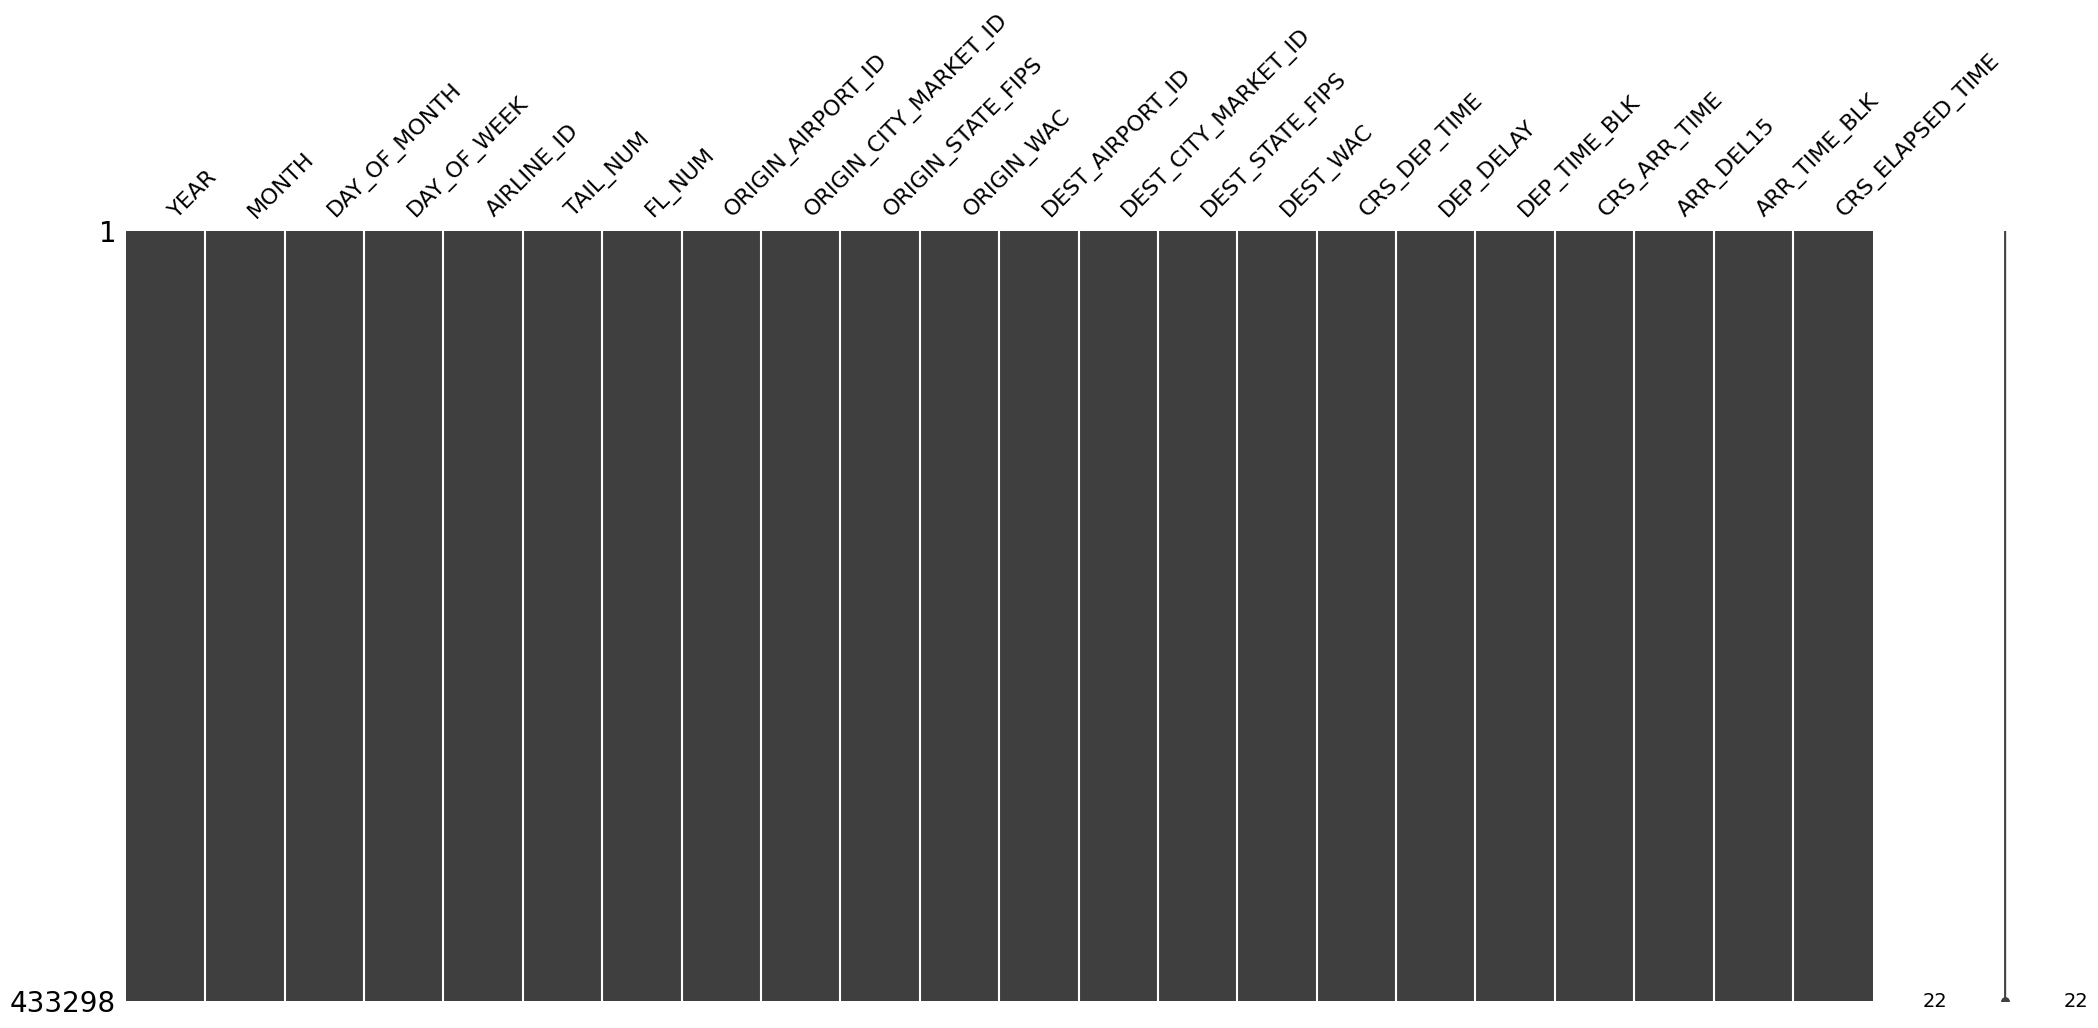

In [34]:
# matrix pour les données manquantes
# voir png généré plot.png
fig = msno.matrix(df_filtered)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

## 5.MODÉLISATION